In [1]:
%matplotlib widget
# %matplotlib inline

import numpy as np
import cmath
import matplotlib.pyplot as plt
import os
print(os.getpid())
%cd ../../

import pylib.mix as mix
import kvn
import pylib.Chebyschev_coefs as ch
import pylib.qucf_read as qucf_r
import pylib.measurement as mse

3704
c:\Users\novikau1\Documents\work\codes\QuCF\scripts-py


In [2]:
# ---------------------------------------------------------------------------------------------------
# --- Some global parameters ---
# ---------------------------------------------------------------------------------------------------
colors_ = ["b", "r", "g", "magenta", "black"]
path_save_ = "./jupyter-notebooks/NL/results/"
for _ in range(30):
    plt.close()

In [6]:
# ---------------------------------------------------------------------------------------------------
# --- Prepare intial parameters ---
# ---------------------------------------------------------------------------------------------------
mix.reload_module(kvn)

# --- two attractors ---
F_ = lambda x:  - x* (x**2 - 0.25)
# ----------------------------------------

nx_ = 7 
nk_    = 7
k_max_ = 10

Di = 1e-4

# --- Linear x- grid ---
Nx_ = 1 << nx_
x_lin_ = np.linspace(-1.0, 1.0, Nx_)  
dx_    = np.diff(x_lin_)[0]
print("nx: {:d}".format(nx_))

# --- k-grid ---
Nk_    = 1 << nk_
k_     = np.linspace(-k_max_, k_max_, Nk_)
dk_    = np.diff(k_)[0]

H_init_, Aa_, Ah_, Aa_asin_, Ah_asin_ = kvn.construct_DI_matrix_1D(x_lin_, F_, flag_asin = True)

# --- LCHS matrices ---
# REMARK: the normalized matrices Bm_asin_ and Bk_asin_ are the same up to a sign.
Ba_, Bm_, Bk_ = kvn.compute_norm_matrices_LCHS(Aa_, Ah_, k_max_, dk_)
print("\n---")
# Ba_asin_, Bm_asin_, Bk_asin_, norm_a_, norm_m_, norm_k_ = \
#     kvn.compute_norm_matrices_LCHS_with_output_norm(Aa_asin_, Ah_asin_, k_max_, dk_)

# --- Rescale matrices to the BULK elements of the D-matrices ---
# rescaling at the edge should be corrected afterwards
dd_diags_ref_  = kvn.get_rescaled_diags_BE(Ba_, Bm_, Bk_)
# dd_diags_asin_ = kvn.get_rescaled_diags_BE(Ba_asin_, Bm_asin_, Bk_asin_)

nx: 7
Matrix Ba:	 nonsparsity, coefnorm: 3, 2.198e+02
Matrix B_kmax:	 nonsparsity, coefnorm: 4, 3.694e+03
Matrix Bk:	 nonsparsity, coefnorm: 4, 5.817e+01

norm of Ba_norm_:     0.333
norm of B_kmax_norm_: 0.250
norm of Bk_norm_:     0.250

---



-------------------------------------------------------------------------
--- Ba-norm ---


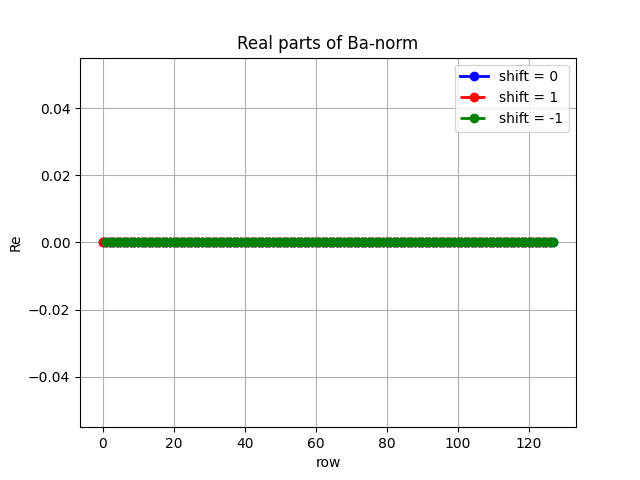

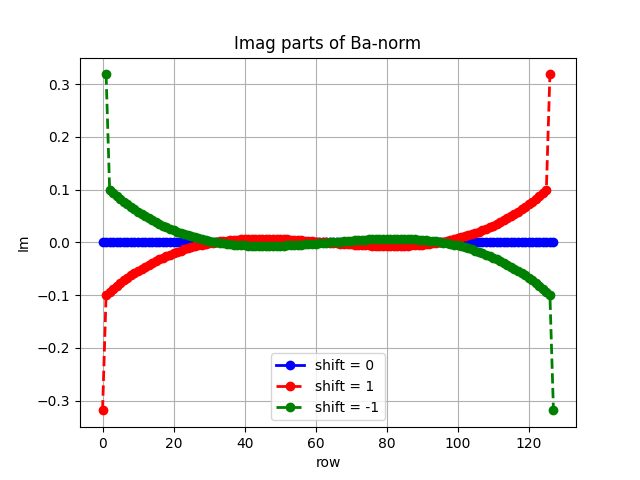


-------------------------------------------------------------------------
--- B-kmax-norm ---


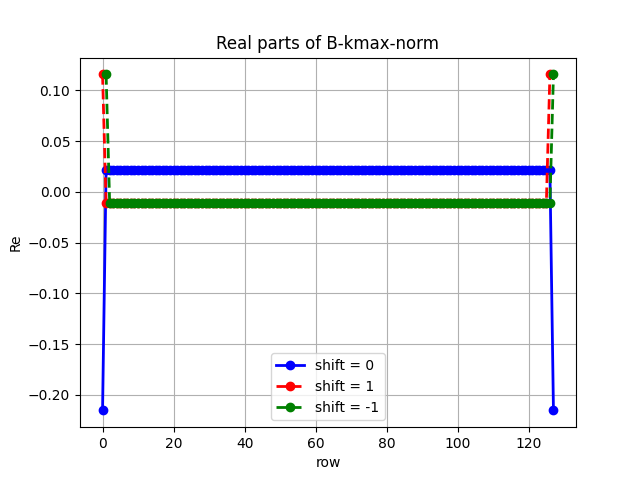

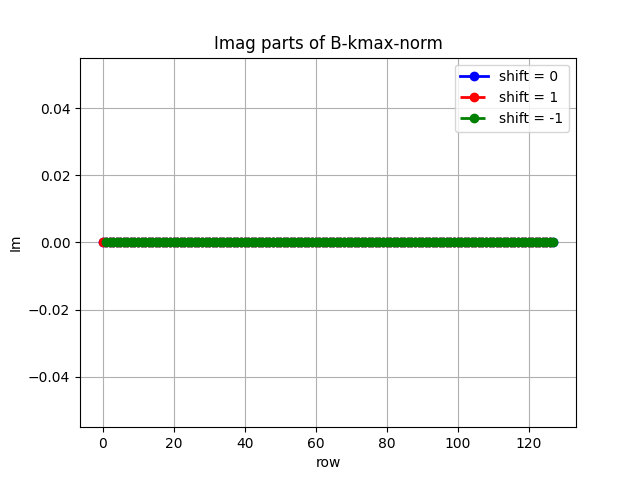

In [8]:
# ---------------------------------------------------------------
# --- Print diagonals of normalized (non-rescaled) matrices ---
# ---------------------------------------------------------------
mix.reload_module(kvn)
def get_plot_diags(flag_save):
    # print()
    # print("-------------------------------------------------------------------------")
    # print("--- H-init ---")
    # A_plot, A_name, flag_save_real = H_init_,     "H-init-norm",     False
    # kvn.plot_save_diagonals(A_plot, A_name, flag_save, flag_save_real, path_save_)

    print()
    print("-------------------------------------------------------------------------")
    print("--- Ba-norm ---")
    A_plot, A_name, flag_save_real = Ba_,     "Ba-norm",     False
    kvn.plot_save_diagonals(A_plot, A_name, flag_save, flag_save_real, path_save_)

    print()
    print("-------------------------------------------------------------------------")
    print("--- B-kmax-norm ---")
    A_plot, A_name, flag_save_real = Bk_, "B-kmax-norm", False
    kvn.plot_save_diagonals(A_plot, A_name, flag_save, flag_save_real, path_save_)
    return
# ------------------------------------------------------------------
get_plot_diags(flag_save = False)